# Lib

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib as plt

# Load Data


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ITMO/Kugaevski/MLP/data/Mushroom_dataset.csv', delimiter=',', 
                    names=['Edibility', 'Сap-shape', 'Сap-surface', 'Cap-color', 'Bruises', 'Odor',
                          'Gill-Attachment', 'Gill-Spacing', 'Gill-Size', 'Gill-Color', 
                           'Stalk-Shape', 'Stalk-Root', 'Stalk-Surface-Above-Ring', 'Stalk-Surface-Below-Ring',
                          'Stalk-Color-Above-Ring','Stalk-Color-Below-Ring', 'Veil-Type','Veil-Color', 'Ring-Number',
                          'Ring-Type', 'Spore-Print-Color', 'Population', 'Habitat'])

In [ ]:
name = df.columns[::-1]
name

Index(['Habitat', 'Population', 'Spore-Print-Color', 'Ring-Type',
       'Ring-Number', 'Veil-Color', 'Veil-Type', 'Stalk-Color-Below-Ring',
       'Stalk-Color-Above-Ring', 'Stalk-Surface-Below-Ring',
       'Stalk-Surface-Above-Ring', 'Stalk-Root', 'Stalk-Shape', 'Gill-Color',
       'Gill-Size', 'Gill-Spacing', 'Gill-Attachment', 'Odor', 'Bruises',
       'Cap-color', 'Сap-surface', 'Сap-shape', 'Edibility'],
      dtype='object')

In [ ]:
name = df.columns
for i in name:
    le = preprocessing.LabelEncoder()
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [ ]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [ ]:
train_percent = 80 # Процент тестовой формирует исходя из значения обучающей выборки

In [ ]:
def train_test_split_X(data, train_percent):
    train = list()
    test = list()
    for i in range(0, len(data)):
        if i <= len(data) * 0.8:
            train.append(data.iloc[i,:])
        else:
            test.append(data.iloc[i,:])
    return np.array(train), np.array(test)

In [ ]:
def train_test_split_Y(data, train_percent):
    train = list()
    test = list()
    for i in range(0, len(data)):
        if i <= len(data) * 0.8:
            train.append(data[i])
        else:
            test.append(data[i])
    return np.array(train), np.array(test)

In [ ]:
trainX, testX = train_test_split_X(X, train_percent)
trainY, testY = train_test_split_Y(Y, train_percent)

#Задаём функцию активации

In [ ]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        # TODO: return output
        pass

    def backward(self, output_gradient, learning_rate):
        # TODO: update parameters and return input gradient
        pass

In [ ]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [ ]:
class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)

        super().__init__(sigmoid, sigmoid_prime)

In [ ]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        # self.weights = np.random.randn(output_size, input_size)
        # self.bias = np.random.randn(output_size, 1)

        self.weights = np.random.uniform(-1, 1, (output_size, input_size)) 
        self.bias = np.random.uniform(1, 0, (output_size, 1))

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input, out=None) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        print(f"INPUT:{self.input.T}")
        print(f"weights_gradient:{weights_gradient}")
        input_gradient = np.dot(self.weights.T, output_gradient)
        print(f"input_gradient:{input_gradient}")
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

In [ ]:
def mse(y_true, y_pred):
    # print(f"y_true:{y_true}")
    # print(f"y_pred:{y_pred}")
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def figure(errors):
  fig = plt.figure()
  ax = plt.axes()
  ax.plot([i + 1 for i in range(0, len(errors), 1)], errors, color='#F27719', label = 'loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()


def train(network, loss, loss_prime, x_train, y_train, x_test, y_test, epochs = 1000, learning_rate = 0.01, verbose = True):
    errors = list()
    for e in range(epochs):
        error = count = 0
        answer = []
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)

            #print(output)

            # error
            # print(f"Y:{y}")
            # print(f"Output:{output}")
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        errors.append(error)

        for i in testX:
          z =  predict(network, i.reshape(22, 1))
          answer.append(np.argmax(z))
        for i, j in zip(answer, testY):
          if i == j:
            count += 1

        if verbose:
            print(f"{e + 1}/{epochs}, loss={error}, accuracy={count/testY.shape[0]}")
    figure(errors)

In [ ]:
trainY = np.reshape(trainY , (trainY.shape[0], 1, 1))

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

In [ ]:
network = [
    Dense(22, 10),
    Sigmoid(),
    Dense(10, 5),
    Sigmoid(),
    Dense(5, 2), 
    Sigmoid()]

In [ ]:
train(network, mse, mse_prime, trainX, trainY, testX, testY, epochs=50, learning_rate=0.001)

Выходные данные были обрезаны до нескольких последних строк (5000).
 [ 0.0060199 ]
 [-0.00123755]]
INPUT:[[0.82919017 0.83328035 0.88778724 0.63099422 0.98228734]]
weights_gradient:[[0.16970247 0.17053957 0.18169498 0.12913959 0.20103542]
 [0.24562866 0.24684028 0.2629867  0.18691763 0.2909802 ]]
input_gradient:[[ 0.30073379]
 [ 0.20709952]
 [-0.04168434]
 [-0.0058542 ]
 [-0.30125087]]
INPUT:[[9.99950983e-01 9.99794023e-01 9.98949744e-01 3.85423057e-06
  1.80720882e-04 9.99999294e-01 1.17887000e-01 4.74809568e-04
  4.20836048e-01 9.98911195e-01]]
weights_gradient:[[ 4.25919909e-02  4.25853053e-02  4.25493441e-02  1.64167400e-07
   7.69763946e-06  4.25940487e-02  5.02128814e-03  2.02240761e-05
   1.79251237e-02  4.25477021e-02]
 [ 2.87697262e-02  2.87652103e-02  2.87409194e-02  1.10890594e-07
   5.19954515e-06  2.87711162e-02  3.39174295e-03  1.36608109e-05
   1.21079314e-02  2.87398103e-02]
 [-4.15243411e-03 -4.15178231e-03 -4.14827633e-03 -1.60052230e-08
  -7.50468339e-07 -4.15263473e

KeyboardInterrupt: ignored

In [ ]:
answer = []
for i in testX:
  z =  predict(network, i.reshape(22, 1))
  answer.append(np.argmax(z))

In [ ]:
count = 0
for i, j in zip(answer, testY):
  if i == j:
    count += 1

In [ ]:
print(f"Accuracy:{count/testY.shape[0]}")

Accuracy:0.7534165181224005


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score, recall_score, roc_curve
conf_matrix = confusion_matrix(testY, answer)
print(f"Confusion matrix:\n{confusion_matrix(testY, answer)}")
print(f"Accuracy: {accuracy_score(testY, answer)}")
print(f"Precision: {average_precision_score(testY, answer)}")
print(f"Recall: {recall_score(testY, answer)}")

Confusion matrix:
[[ 210  318]
 [  97 1058]]
Accuracy: 0.7534165181224005
Precision: 0.7619566290222926
Recall: 0.9160173160173161


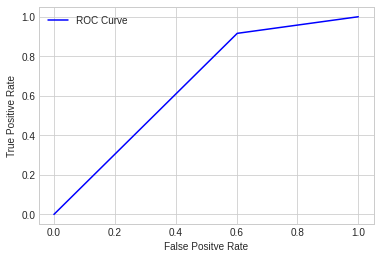

In [ ]:
fpr, tpr, _ = roc_curve(testY, answer)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
